In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from models import LogisticRegression
from ml_utils import optim_data, optim_bench, diagnostic

C:\Users\Utente\AppData\Local\Temp\ipykernel_9396\4170031481.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load datasets

In [2]:
# Apple quality
X_train_apple = pd.read_csv("datasets/apple_quality/apple_X_train.csv").values
y_train_apple = pd.read_csv("datasets/apple_quality/apple_y_train.csv").values.reshape(-1)
X_test_apple = pd.read_csv("datasets/apple_quality/apple_X_test.csv").values
y_test_apple = pd.read_csv("datasets/apple_quality/apple_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_apple.shape}, y_train = {y_train_apple.shape}
X_test = {X_test_apple.shape}, y_test = {y_test_apple.shape}""")


Apple quality dataset
X_train = (3200, 8), y_train = (3200,)
X_test = (800, 8), y_test = (800,)


In [3]:
w0Apple = (2 + 2) * np.random.default_rng(42).random(8) - 2

In [30]:
benchApple1 = LogisticRegression(C=1).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple3 = LogisticRegression(C=1, solver="CG").fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)

benchApple_data = optim_bench([benchApple1, benchApple2, benchApple3])

In [2]:
# Cars purchaising
X_train_car = pd.read_csv("datasets/cars/car_X_train.csv").values
y_train_car = pd.read_csv("datasets/cars/car_y_train.csv").values.reshape(-1)
X_test_car = pd.read_csv("datasets/cars/car_X_test.csv").values
y_test_car = pd.read_csv("datasets/cars/car_y_test.csv").values.reshape(-1)

print(f"""
Cars purchaising dataset
X_train = {X_train_car.shape}, y_train = {y_train_car.shape}
X_test = {X_test_car.shape}, y_test = {y_test_car.shape}""")


Cars purchaising dataset
X_train = (754, 4), y_train = (754,)
X_test = (189, 4), y_test = (189,)


In [3]:
w0Car = (2 + 2) * np.random.default_rng(42).random(4) - 2

In [4]:
benchCar1 = LogisticRegression(C=1).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)
benchCar2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)
benchCar3 = LogisticRegression(C=1, solver="CG").fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)

benchCar_data = optim_bench([benchCar1, benchCar2, benchCar3])

In [ ]:
# Loan eligibility
X_train_loan = pd.read_csv("datasets/loan_data/loan_X_train.csv").values
y_train_loan = pd.read_csv("datasets/loan_data/loan_y_train.csv").values.reshape(-1)
X_test_loan = pd.read_csv("datasets/loan_data/loan_X_test.csv").values
y_test_loan = pd.read_csv("datasets/loan_data/loan_y_test.csv").values.reshape(-1)

print(f"""
Loan eligibility dataset
X_train = {X_train_loan.shape}, y_train = {y_train_loan.shape}
X_test = {X_test_loan.shape}, y_test = {y_test_loan.shape}""")

In [ ]:
w0Loan = (1.5 + 1.5) * np.random.default_rng(42).random(12) - 1.5

In [ ]:
benchmarkLoan = LogisticRegression(C=1).fit(w0Loan, X_train_car, y_train_car, X_test_car, y_test_car)

In [ ]:
# HR score
X_train_hr = pd.read_csv("datasets/hr_score/hr_X_train.csv").values
y_train_hr = pd.read_csv("datasets/hr_score/hr_y_train.csv").values.reshape(-1)
X_test_hr = pd.read_csv("datasets/hr_score/hr_X_test.csv").values
y_test_hr = pd.read_csv("datasets/hr_score/hr_y_test.csv").values.reshape(-1)

print(f"""
HR score dataset
X_train = {X_train_hr.shape}, y_train = {y_train_hr.shape}
X_test = {X_test_hr.shape}, y_test = {y_test_hr.shape}""")

In [ ]:
w0HR = (2 + 2) * np.random.default_rng(42).random(10) - 2

In [ ]:
benchmarkHR = LogisticRegression(C=1).fit(w0HR, X_train_car, y_train_car, X_test_car, y_test_car)

In [ ]:
# Bank churn
X_train_bank = pd.read_csv("datasets/bank_churn/bank_X_train.csv").values
y_train_bank = pd.read_csv("datasets/bank_churn/bank_y_train.csv").values.reshape(-1)
X_test_bank = pd.read_csv("datasets/bank_churn/bank_X_test.csv").values
y_test_bank = pd.read_csv("datasets/bank_churn/bank_y_test.csv").values.reshape(-1)

print(f"""
Bank churn dataset
X_train = {X_train_bank.shape}
X_test = {X_test_bank.shape}""")

In [ ]:
w0Bank = (1.5 + 1.5) * np.random.default_rng(42).random(18) - 1.5

In [ ]:
benchmarkBank = LogisticRegression(C=1).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)

In [2]:
# Breast cancer
X_train_breast = pd.read_csv("datasets/breast_cancer/breast_X_train.csv").values
y_train_breast = pd.read_csv("datasets/breast_cancer/breast_y_train.csv").values.reshape(-1)
X_test_breast = pd.read_csv("datasets/breast_cancer/breast_X_test.csv").values
y_test_breast = pd.read_csv("datasets/breast_cancer/breast_y_test.csv").values.reshape(-1)

print(f"""
Breast cancer dataset
X_train = {X_train_breast.shape}, y_train = {y_train_breast.shape}
X_test = {X_test_breast.shape}, y_test = {y_test_breast.shape}""")


Breast cancer dataset
X_train = (455, 31), y_train = (455,)
X_test = (114, 31), y_test = (114,)


In [3]:
w0Breast = (1.5 + 1.5) * np.random.default_rng(42).random(31) - 1.5

In [5]:
benchmarkBreast = LogisticRegression(C=1).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)

# Apple quality dataset

In [17]:
# SGD-Fixed
sgdApple_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05)
#sgdApple_fixed2 = LogisticRegression(solver="SGD-Fixed", C=0.005, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)
sgdApple_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.005)

In [18]:
# SGD-Decreasing
sgdApple_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
#sgdApple_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05)

In [19]:
# SGD-Armijo
#sgdApple_armijo1 = LogisticRegression(solver="SGD-Armijo", C=0.5, minibatch=64).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
#sgdApple_armijo2 = LogisticRegression(solver="SGD-Armijo", C=2, minibatch=64).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.001)
sgdApple_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=64).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)

In [20]:
# SGDM
#sgdmApple_1 = LogisticRegression(solver="SGDM", C=0.001, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.5, momentum=0.9)
sgdmApple_2 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
sgdmApple_3 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05, momentum=0.9)

In [21]:
# MSL-SGDM-C
#mslcApple_1 = LogisticRegression(solver="MSL-SGDM-C", C=2, minibatch=64).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslcApple_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)
mslcApple_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.0001, momentum=0.9)

In [22]:
# MSL-SGDM-R
#mslrApple_1 = LogisticRegression(solver="MSL-SGDM-R", C=2, minibatch=64).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslrApple_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)
mslrApple_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.0001, momentum=0.9)

In [67]:
modelsApple_data = optim_data([sgdApple_fixed1, sgdApple_fixed3, sgdApple_decre1, sgdApple_decre3, sgdApple_armijo3,
                               sgdmApple_2, sgdmApple_3, mslcApple_2, mslcApple_3, mslrApple_2, mslrApple_3])
modelsApple_data[["Solver", "Loss"]]

,Solver,Loss
0,SGD-Fixed,2080.794839
1,SGD-Fixed,2074.556582
2,SGD-Decreasing,2074.553123
3,SGD-Decreasing,2074.320386
4,SGD-Armijo,2017.615576
5,SGDM,2074.693845
6,SGDM,2074.473964
7,MSL-SGDM-C,2032.656934
8,MSL-SGDM-C,2040.178890
9,MSL-SGDM-R,2029.883551


## Summary

In [46]:
pd.concat([benchApple_data.drop(columns={"Solution", "Loss/Epochs"}),
          modelsApple_data.drop(columns={"Solution", "Loss/Epochs"})], ignore_index=True)#.sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,L-BFGS,1,NaN,NaN,NaN,1644.496774,0.712087,NaN,8,0.745313,0.75375
1,Newton-CG,1,NaN,NaN,NaN,1644.496101,0.003009,NaN,11,0.745313,0.75375
2,CG,1,NaN,NaN,NaN,1644.496101,0.000010,NaN,17,0.745313,0.75375
3,SGD-Fixed,1,32.0,0.0500,0.0,2080.794839,648.498645,0.453609,200,0.708750,0.71750
4,SGD-Fixed,1,32.0,0.0050,0.0,2074.556582,639.794136,0.454683,200,0.712812,0.73750
5,SGD-Decreasing,1,32.0,1.0000,0.0,2074.553123,639.788899,0.388026,200,0.712812,0.73750
6,SGD-Decreasing,1,32.0,0.0500,0.0,2074.320386,639.553882,0.464392,200,0.713125,0.74000
7,SGD-Armijo,1,64.0,1.0000,0.0,2017.615576,544.060508,4.751069,200,0.686562,0.70000
8,SGDM,1,32.0,0.1000,0.9,2074.693845,639.906931,0.488184,200,0.713750,0.73750
9,SGDM,1,32.0,0.0500,0.9,2074.473964,639.612288,0.366807,200,0.713437,0.73750


In [32]:
pd.concat([benchApple_data[["Solver", "Solution"]],
          pd.concat([modelsApple_data1, modelsApple_data3, modelsApple_data4])[["Solver", "Solution"]]])

,Solver,Solution
0,L-BFGS,"[-0.0367, 1.2483, 0.419, 1.1373, 0.0338, 0.8558, -0.2394, -0.6675]"
1,Newton-CG,"[-0.0362, 1.2467, 0.4179, 1.1368, 0.0334, 0.8548, -0.2397, -0.6667]"
2,CG,"[-0.0362, 1.2467, 0.4179, 1.1368, 0.0334, 0.8548, -0.2397, -0.6667]"
0,SGD-Fixed,"[0.0027, 0.0818, -0.0166, 0.1115, -0.0061, 0.0937, -0.0878, -0.035]"
1,SGD-Fixed,"[0.0009, 0.0986, 0.0018, 0.1028, -0.0095, 0.0991, -0.095, -0.0245]"
2,SGD-Decreasing,"[0.0008, 0.0986, 0.0018, 0.1028, -0.0095, 0.0991, -0.095, -0.0245]"
3,SGD-Decreasing,"[0.0012, 0.0989, 0.0026, 0.1027, -0.0099, 0.0996, -0.095, -0.0243]"
4,SGD-Armijo,"[0.0235, 0.1394, -0.0622, 0.1389, -0.0525, 0.1407, -0.1911, 0.0037]"
0,SGDM,"[0.002, 0.0989, 0.0018, 0.1015, -0.0097, 0.0978, -0.0968, -0.025]"
1,SGDM,"[0.0017, 0.0992, 0.0022, 0.102, -0.0096, 0.0985, -0.0961, -0.0244]"


# Cars purchaising dataset

In [5]:
# SGD-Fixed
#sgdCar_fixed1 = LogisticRegression(solver="SGD-Fixed", C=0.01, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.05)
sgdCar_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [6]:
# SGD-Decreasing
sgdCar_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [7]:
# SGD-Armijo
sgdCar_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [8]:
# SGDM
sgdmCar_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
sgdmCar_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
sgdmCar_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [9]:
# MSL-SGDM-C
mslcCar_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslcCar_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
mslcCar_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrCar_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslrCar_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
mslrCar_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [12]:
modelsCar_data = optim_data([sgdCar_fixed2, sgdCar_fixed3, sgdCar_decre1, sgdCar_decre2, sgdCar_decre3, sgdCar_armijo1, sgdCar_armijo2, sgdCar_armijo3,
                             sgdmCar_1, sgdmCar_2, sgdmCar_3, mslcCar_1, mslcCar_2, mslcCar_3, mslrCar_1, mslrCar_2, mslrCar_3])

## Summary

In [14]:
pd.concat([benchCar_data.drop(columns={"Solution", "Loss/Epochs"}),
          modelsCar_data.drop(columns={"Solution", "Loss/Epochs"})], ignore_index=True)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,L-BFGS,1,NaN,NaN,NaN,283.168161,3.693139e-02,NaN,7,0.826260,0.830688
1,Newton-CG,1,NaN,NaN,NaN,283.168154,3.391424e-04,NaN,7,0.826260,0.830688
2,CG,1,NaN,NaN,NaN,283.168154,3.493771e-07,NaN,11,0.826260,0.830688
3,SGD-Fixed,1,16.0,0.05,0.0,451.110432,2.143999e+02,0.145900,200,0.824934,0.825397
4,SGD-Fixed,1,16.0,0.01,0.0,452.426716,2.154016e+02,0.137121,200,0.827586,0.814815
5,SGD-Decreasing,1,16.0,1.00,0.0,452.464604,2.154181e+02,0.136181,200,0.827586,0.814815
6,SGD-Decreasing,1,16.0,0.10,0.0,452.473927,2.154157e+02,0.151905,200,0.828912,0.814815
7,SGD-Decreasing,1,16.0,0.01,0.0,445.332801,2.086127e+02,0.140611,200,0.830239,0.825397
8,SGD-Armijo,1,16.0,1.00,0.0,404.387195,1.702158e+02,1.198391,200,0.763926,0.761905
9,SGD-Armijo,1,16.0,0.10,0.0,404.488394,1.705152e+02,1.170117,200,0.762599,0.761905


In [15]:
pd.concat([benchCar_data[["Solver", "Solution"]],
          modelsCar_data[["Solver", "Solution"]]], ignore_index=True)

,Solver,Solution
0,L-BFGS,"[-0.6234, -0.1484, 2.2591, 1.1438]"
1,Newton-CG,"[-0.6234, -0.1487, 2.2591, 1.1436]"
2,CG,"[-0.6234, -0.1487, 2.2591, 1.1436]"
3,SGD-Fixed,"[-0.0648, -0.0017, 0.2514, 0.1356]"
4,SGD-Fixed,"[-0.0655, 0.0097, 0.2423, 0.1373]"
5,SGD-Decreasing,"[-0.0652, 0.0103, 0.2419, 0.1378]"
6,SGD-Decreasing,"[-0.0649, 0.0106, 0.2417, 0.1381]"
7,SGD-Decreasing,"[-0.0257, -0.0003, 0.2824, 0.1582]"
8,SGD-Armijo,"[0.2381, -0.0738, 0.6283, 0.3119]"
9,SGD-Armijo,"[0.2444, -0.084, 0.6327, 0.3147]"


# Loan eligibility dataset

In [ ]:
# SGD-Fixed
sgdLoan_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

In [ ]:
# SGD-Decreasing
sgdLoan_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

In [ ]:
# SGD-Armijo
sgdLoan_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01)

In [ ]:
# SGDM
sgdmLoan_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
sgdmLoan_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
sgdmLoan_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05, momentum=0.9)

In [ ]:
# MSL-SGDM-C
mslcLoan1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslcLoan2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslcLoan3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [ ]:
# MSL-SGDM-R
mslrLoan1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslrLoan2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslrLoan3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [ ]:
modelsLoan_data1 = optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_fixed3, sgdLoan_decre1, sgdLoan_decre2, sgdLoan_decre3])

In [ ]:
modelsLoan_data2 = optim_data([sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3])

In [ ]:
modelsLoan_data3 = optim_data([sgdmLoan_1, sgdmLoan_2, sgdmLoan_3])

In [ ]:
modelsLoan_data4 = optim_data([mslcLoan1, mslcLoan2, mslcLoan3, mslrLoan1, mslrLoan2, mslrLoan3])

## Summary

In [27]:
pd.concat([optim_bench(benchmarkLoan).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([modelsLoan_data1, modelsLoan_data2, modelsLoan_data3, modelsLoan_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})])

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.986794,0.325904,0.203844,200,0.625000,0.687500
1,SGD-Fixed,16,0.10,0.0,0.984274,0.317291,0.186637,200,0.682292,0.708333
2,SGD-Fixed,16,0.05,0.0,0.984186,0.316995,0.204159,200,0.682292,0.708333
3,SGD-Decreasing,16,1.00,0.0,0.984125,0.316790,0.183476,200,0.682292,0.708333
4,SGD-Decreasing,16,0.10,0.0,0.984125,0.316791,0.184208,200,0.682292,0.708333
5,SGD-Decreasing,16,0.05,0.0,0.983771,0.315633,0.200348,200,0.684896,0.708333
0,SGD-Armijo,16,1.00,0.0,0.984005,0.316392,0.795221,200,0.682292,0.708333
1,SGD-Armijo,16,0.10,0.0,0.983981,0.316315,0.755242,200,0.682292,0.708333
2,SGD-Armijo,16,0.01,0.0,0.983947,0.316201,0.696185,200,0.682292,0.708333
0,SGDM,16,1.00,0.9,0.984179,0.317057,0.226201,200,0.682292,0.708333


# HR score dataset

In [ ]:
# SGD-Fixed
sgdHR_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [ ]:
# SGD-Decreasing
sgdHR_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [ ]:
# SGD-Armijo
sgdHR_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [ ]:
# SGDM
sgdmHR1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
sgdmHR2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
sgdmHR3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [ ]:
# MSL-SGDM-C
mslcHR1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslcHR2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslcHR3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [ ]:
# MSL-SGDM-R
mslrHR1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslrHR2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslrHR3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [ ]:
modelsHR_data1 = optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_fixed3, sgdHR_decre1, sgdHR_decre2, sgdHR_decre3])

In [ ]:
modelsHR_data2 = optim_data([sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3])

In [ ]:
modelsHR_data3 = optim_data([sgdmHR1, sgdmHR2, sgdmHR3])

In [ ]:
modelsHR_data4 = optim_data([mslcHR1, mslcHR2, mslcHR3, mslrHR1, mslrHR2, mslrHR3])

## Summary

In [16]:
pd.concat([optim_bench(benchmarkHR).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([modelsHR_data1, modelsHR_data2, modelsHR_data3, modelsHR_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})])

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.825399,0.318026,0.127771,200,0.462500,0.316667
1,SGD-Fixed,16,0.10,0.0,0.825121,0.316516,0.140579,200,0.462500,0.333333
2,SGD-Fixed,16,0.01,0.0,0.819480,0.305799,0.115701,200,0.470833,0.316667
3,SGD-Decreasing,16,1.00,0.0,0.825272,0.316845,0.124959,200,0.462500,0.333333
4,SGD-Decreasing,16,0.10,0.0,1.060016,0.348094,0.133337,200,0.475000,0.366667
5,SGD-Decreasing,16,0.01,0.0,3.238566,0.735635,0.126931,200,0.462500,0.366667
0,SGD-Armijo,16,1.00,0.0,0.963653,0.466465,0.569457,200,0.458333,0.316667
1,SGD-Armijo,16,0.10,0.0,0.963683,0.466530,0.533494,200,0.458333,0.316667
2,SGD-Armijo,16,0.01,0.0,0.963519,0.466007,0.497300,200,0.458333,0.316667
0,SGDM,16,1.00,0.9,0.968139,0.481250,0.148799,200,0.458333,0.316667


# Bank churn dataset

In [ ]:
# SGD-Fixed
sgdBank_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)
sgdBank_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.05)

In [ ]:
# SGD-Decreasing
sgdBank_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgdBank_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)

In [ ]:
# SGD-Armijo
sgdBank_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)
sgdBank_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.001)

In [ ]:
modelsBank_data1 = optim_data([])

In [ ]:
modelsBank_data2 = optim_data([])

In [ ]:
modelsBank_data3 = optim_data([])

## Summary

In [ ]:
pd.concat([optim_bench(benchmarkBank).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([]).drop(columns={"Solution", "Loss/Epochs", "labels"})])

# Breast cancer dataset

In [19]:
# SGD-Fixed
sgdBreast_fixed1 = LogisticRegression(solver="SGD-Fixed", C=0.01, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_fixed2 = LogisticRegression(solver="SGD-Fixed", C=0.01, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_fixed3 = LogisticRegression(solver="SGD-Fixed", C=0.01, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

In [7]:
# SGD-Decreasing
sgdBreast_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.001)

In [8]:
# SGD-Armijo
sgdBreast_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

In [9]:
# SGDM
sgdmBreast_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
sgdmBreast_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
sgdmBreast_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-C
mslcBreast_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslcBreast_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
mslcBreast_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [11]:
# MSL-SGDM-R
mslrBreast_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslrBreast_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
mslrBreast_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [20]:
modelsBreast_data1 = optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3])

In [13]:
modelsBreast_data2 = optim_data([sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3])

In [14]:
modelsBreast_data3 = optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3])

In [15]:
modelsBreast_data4 = optim_data([mslcBreast_1, mslcBreast_2, mslcBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3])

## Summary

In [21]:
pd.concat([optim_bench(benchmarkBreast).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([modelsBreast_data1, modelsBreast_data2, modelsBreast_data3, modelsBreast_data4]).drop(columns={"Solution", "Loss/Epochs"})])

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,L-BFGS,1.00,NaN,NaN,NaN,206.613346,0.066685,NaN,12,0.362637,0.412281
0,SGD-Fixed,0.01,16.0,1.000,0.0,207.268782,7.367541,0.211540,200,0.360440,0.412281
1,SGD-Fixed,0.01,16.0,0.100,0.0,207.403329,7.687981,0.215121,200,0.360440,0.412281
2,SGD-Fixed,0.01,16.0,0.010,0.0,207.221704,7.614286,0.211379,200,0.362637,0.403509
3,SGD-Decreasing,1.00,16.0,1.000,0.0,256.039726,126.977465,0.206649,200,0.353846,0.403509
4,SGD-Decreasing,1.00,16.0,0.100,0.0,255.987300,126.768624,0.228077,200,0.353846,0.403509
5,SGD-Decreasing,1.00,16.0,0.001,0.0,275.149872,89.209883,0.220693,200,0.303297,0.324561
0,SGD-Armijo,1.00,16.0,1.000,0.0,251.138482,103.682391,0.810742,200,0.331868,0.377193
1,SGD-Armijo,1.00,16.0,0.100,0.0,251.138482,103.682391,0.803102,200,0.331868,0.377193
2,SGD-Armijo,1.00,16.0,0.010,0.0,251.138482,103.682391,0.796158,200,0.331868,0.377193


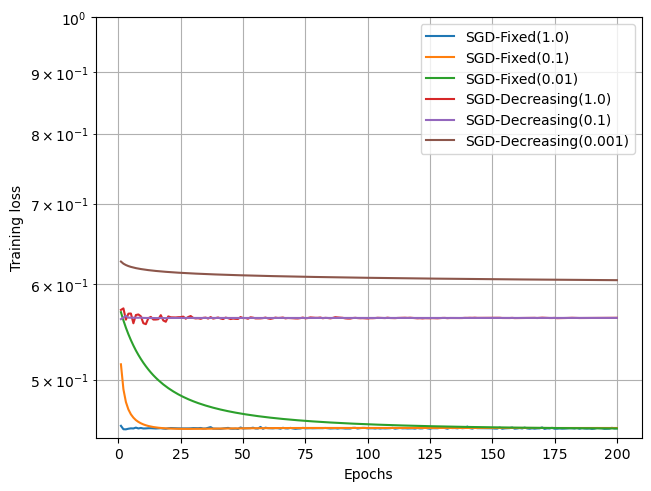

In [22]:
diagnostic(modelsBreast_data1)